<a href="https://colab.research.google.com/github/annagradziel12/matplotlib/blob/master/Matplotlib_cwiczenia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.1.1'

# Koło

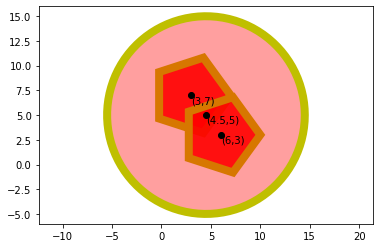

In [ ]:
def kolo(x0, y0, r, facecolor="#FF0000E5", edgecolor="y", n=6):
    alpha = np.linspace(0, 2*np.pi, n)

    x = x0 + r * np.cos(alpha)
    y = y0 + r * np.sin(alpha)

    plt.fill(x, y, linewidth=8, facecolor=facecolor, edgecolor=edgecolor) # lw=8, 
    plt.plot(x0, y0, "ko")
    plt.text(x0, y0, f"({x0},{y0})", horizontalalignment="left", verticalalignment="top") # punkt na lewo i do gory od tekstu
    # plt.scatter(x0, y0, color="k")
    

kolo(3,7,4)
kolo(6,3,4)
kolo(4.5,5,10, facecolor="#FF000060", n=100)
plt.axis("equal")
plt.show()

# Wykres liniowy

In [ ]:
import seaborn as sns
flights = sns.load_dataset("flights")
sredniPasazerowie = flights["passengers"].groupby(flights["year"]).agg(np.mean)
sredniPasazerowie

year
1949    126.666667
1950    139.666667
1951    170.166667
1952    197.000000
1953    225.000000
1954    238.916667
1955    284.000000
1956    328.250000
1957    368.416667
1958    381.000000
1959    428.333333
1960    476.166667
Name: passengers, dtype: float64

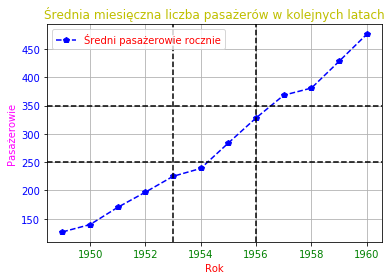

In [ ]:
plt.plot(sredniPasazerowie, "bp--", label="Średni pasażerowie rocznie")
plt.title("Średnia miesięczna liczba pasażerów w kolejnych latach", color="y")
plt.xlabel("Rok", color="red")
plt.ylabel("Pasażerowie", color="magenta")
plt.axvline(1953, color="k", linestyle="--")
plt.axvline(1956, color="k", linestyle="--")
plt.axhline(250, color="k", linestyle="--")
plt.axhline(350, color="k", linestyle="--")
plt.xticks(color="g")
plt.yticks(color="b")
plt.grid(True)

l = plt.legend()
for text in l.get_texts():
#     print(text)
    text.set_color("r")

# legend = plt.legend(loc=2)
# plt.setp(legend.get_texts(), color='r')

plt.show()

# Wykres kołowy

In [ ]:
tips = sns.load_dataset("tips")
smoker = tips.smoker.value_counts()
smoker

No     151
Yes     93
Name: smoker, dtype: int64

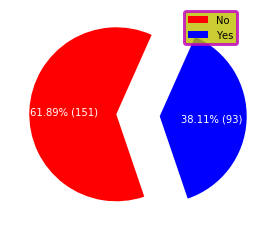

In [ ]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
#         return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
        return f'{pct:.2f}% ({val:d})'
    return my_autopct

plt.pie(smoker.values,
        labels=smoker.index,
        colors=["red", "blue"],
       explode=(0.2, 0.3),
       startangle=66,
#         autopct="%.2f%%",
       autopct=make_autopct(smoker.values),
       textprops={"color":"w"})
l = plt.legend(facecolor="y", edgecolor="m")
l.get_frame().set_linewidth(3.0)
plt.show()

# Wykres słupkowy

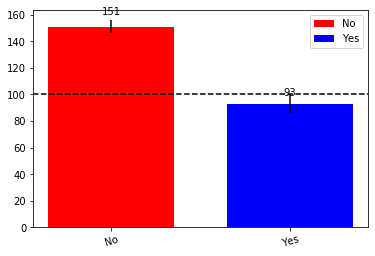

In [ ]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.,
                 1.05*height,
                f'{int(height)}',
                ha='center', va='bottom')

x = np.arange(2) # współrzędne środków słupków
s = 0.7             # szerokość każdego słupka
rects = plt.bar(x, smoker.values, s, color=["r", "b"], yerr=(5,7))
plt.xticks(x, smoker.index, rotation=17)
autolabel(rects)
plt.axhline(100, color="k", linestyle="--")
plt.legend(rects, smoker.index)
plt.show()

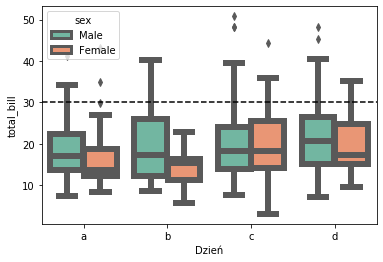

In [ ]:
tips = sns.load_dataset("tips")
sns.boxplot(tips["day"],
            tips["total_bill"],
            tips["sex"],
            palette="Set2",
            linewidth=6)

plt.xlabel("Dzień")
plt.xticks([0,1,2,3],["a", "b", "c", "d"])
plt.axhline(30, ls="--", color="k")
plt.show()

https://seaborn.pydata.org/generated/seaborn.barplot.html